In [1]:
import math
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

## Toy Example 1
### Data generation
$$y = e^{-(x-3)^2} + N(0, 0.1),  x\geq0$$

In [2]:
ffun = lambda x: math.exp(-(x-3)**2)
ffun = np.vectorize(ffun)

np.random.seed(seed = 2017)

x = np.arange(0.1, 4.1, 0.1)
y = ffun(x) + 0.1*np.random.normal(size=len(x))

In [3]:
DataX = DataFrame({'x': x, 'y': y})

In [4]:
pd.options.display.max_rows = 10
DataX

,x,y
0,0.1,-0.102072
1,0.2,-0.013646
2,0.3,0.020592
3,0.4,0.058507
4,0.5,-0.037527
...,...,...
35,3.6,0.589007
36,3.7,0.615242
37,3.8,0.493638
38,3.9,0.392832


In [5]:
DataX.describe()

,x,y
count,40.000000,40.000000
mean,2.050000,0.397721
std,1.169045,0.410285
min,0.100000,-0.129335
25%,1.075000,0.012032
50%,2.050000,0.325889
75%,3.025000,0.713357
max,4.000000,1.142684


### Calculate the covariance between x and y
Method 1: numpy

In [6]:
corr1 = np.corrcoef(x,y)[0,1]
print 'The covariance between x and y is {}'.format(corr1)

The covariance between x and y is 0.801511522813


Method 2: pandas

In [7]:
corr2 = DataX.corr().values[0,1]
print 'The covariance between x and y is {}'.format(corr2)

The covariance between x and y is 0.801511522813


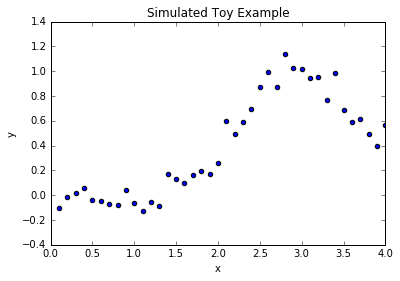

In [8]:
plt.scatter(x,y)
plt.title('Simulated Toy Example')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,4]);

plot=DataX.plot.scatter(x='x',y='y').set_title('Simulated Toy Example')

### Fit data

In [9]:
def curve_fitting(x, y, degrees):
    p = np.polyfit(x, y, degrees)
    q = np.poly1d(p)
    plt.plot(x, q(x))
    return q(x)

/Users/lutaodai/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


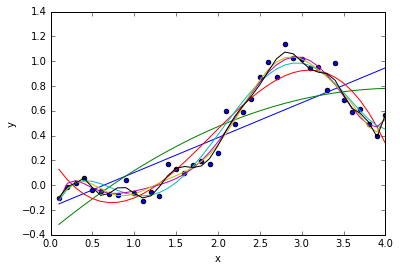

In [10]:
plt.scatter(x,y)
plt.xlim([0,4]);

fit1 = curve_fitting(x, y, 1) # Linear model
fit2 = curve_fitting(x, y, 2) # Quadratic model
fit3 = curve_fitting(x, y, 3) # Cubic model
fit4 = curve_fitting(x, y, 5) # Degree 5
fit5 = curve_fitting(x, y, 9) # Degree 9
fit6 = curve_fitting(x, y, 10) # Degree 10
fit7 = curve_fitting(x, y, 20) # Degree 20

plt.xlabel('x');
plt.ylabel('y');

## Mean Squared Error (MSE)
$$MSE=\frac{1}n \sum_{i=1}^{n}[y_i-\hat{f}(x)]^2$$

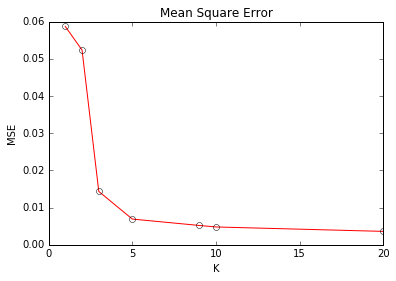

In [11]:
n = len(x)
MSE = []
MSE.append(sum((y-fit1)**2)/n)
MSE.append(sum((y-fit2)**2)/n)
MSE.append(sum((y-fit3)**2)/n)
MSE.append(sum((y-fit4)**2)/n)
MSE.append(sum((y-fit5)**2)/n)
MSE.append(sum((y-fit6)**2)/n)
MSE.append(sum((y-fit7)**2)/n)
K = [1, 2, 3, 5, 9, 10, 20]

plt.plot(K, MSE, 'ro-', mfc = 'none')
plt.title('Mean Square Error')
plt.xlabel('K')
plt.ylabel('MSE')

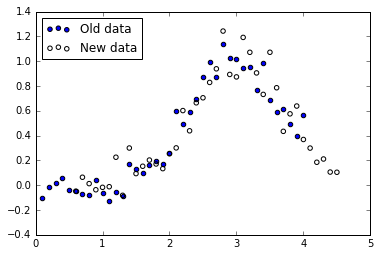

In [12]:
np.random.seed(seed = 9999)

xnew = np.arange(0.6, 4.6, 0.1)
ynew = ffun(xnew) + 0.1*np.random.normal(size=len(xnew))

TextX = DataFrame({'xnew': xnew, 'ynew': ynew})

plt.scatter(x, y)
plt.xlim([0,5])
plt.scatter(xnew, ynew, facecolor='none');
plt.legend(['Old data','New data'],loc=2);

In [13]:
def predict(x, y, degrees, xnew):
    p = np.polyfit(x, y, degrees)
    q = np.poly1d(p)
    return q(xnew)

predictions = [predict(x, y, i, xnew) for i in [1, 2, 3, 5, 9]]
nnew = TextX.shape[0]
TestMSE = [sum((ynew - pred)**2)/nnew for pred in predictions]
TestMSE


[0.14802342868866114,
 0.093983983835958379,
 0.047514974333808704,
 0.065636847101221613,
 0.76503751380595975]

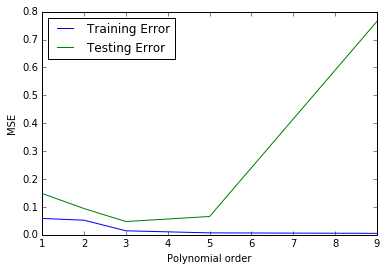

In [14]:
plt.plot(K[:-2], MSE[:-2], label='Training Error')
plt.plot(K[:-2], TestMSE, label = 'Testing Error')
plt.legend(loc=2);
plt.xlabel('Polynomial order');
plt.ylabel('MSE');

Expected Test MSE
$$D[y-\hat{f}(x)]^2=Var(\hat{f}(x))^2+[Bias\hat{f}]^2+Var(\epsilon)$$

Related topics:
* Training data, testing data
* Types of errors
* Bias-variance trade-off

## To be continued ...